# Introduction to Numpy
© Ehsan Saleh, 2023

### Let's get started!

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Numpy

## Scalar vs. Matrix vs. Tensor

<img src="02_tensors.jpeg" alt="Drawing" style="width: 50%;"/>

Credits: [https://www.i2tutorials.com/what-do-you-mean-by-tensor-and-explain-about-tensor-datatype-and-ranks/](https://www.i2tutorials.com/what-do-you-mean-by-tensor-and-explain-about-tensor-datatype-and-ranks/)

* Numpy arrays and PyTorch tensors are all "tensors".

* Each tensor has a number of dimensions:
  * *Scalars* are 0-dimensional tensors.
  * *Vectors* are 1-dimensional tensors.
  * *Matrices* are 2-dimensional tensors.
  * We can have n-dimensional tensors the same way.
  
In the course, we may use the "array”, "tensor”, and “matrix” terms interchangeably. 

## 1. Array Attributes

Let's say `arr` is a numpy array. These are some key attributes:

* **Shape**: `arr.shape` denotes the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. 


* **Size**: `arr.size` denotes the total number of elements of the array.


* **Data-type**: `arr.dtype` denotes the type of the elements in the array. Some examples are `int32`, `int64`, `float32`, `float64`, `bool` and so on.


* **Number of Dimensions**: `arr.ndim` denotes the number of dimensions in the array.


In other words, we have 
```
arr.size == np.prod(arr.shape)
arr.ndim == len(arr.shape)
```

In [2]:
a = np.array([[1, 2, 3], 
              [5, 6, 7]])

In [3]:
# The number of dimensions in `a`
a.ndim

2

In [4]:
# Let's check out the shape of `a`
a.shape

(2, 3)

In [5]:
# Let's look at what data-type numpy used for storing `a`
a.dtype

dtype('int64')

**Question**: Why did numpy assign a data type of `int64` as opposed to `float64`?

**Answer**: The lists `[1, 2, 3]` and `[5, 6, 7]` included only integer numbers. If any of the numbers had decimals, the resulting array would have had a floating-point data type.

In [6]:
# Let's select the first entry in `a`
b = a[0]
b.shape

(3,)

In [7]:
b.size

3

In [8]:
c = b[0]
c.shape

()

In [9]:
c.size

1

In [10]:
d = a[0, 0]
d.shape

()

In [11]:
d.size

1

**Question**: What does a shape of `()` even mean?

**Answer**: `()` is an empty tuple. Every time you index one of the array dimensions, the output loses that dimension. Since `a` initially had two dimensions, `a[0, 0]` ends up having zero dimensions.

In [12]:
# Let's create an array with a single entry
c = np.array([1])
c.shape

(1,)

**Question**: Is `c` different from `b`? 
  * If yes, aren't they both scalars?
  * If no, then why do they have different shapes?

Also, see the next cell.

In [13]:
a = np.array(3)
b = np.array([3])
c = np.array([[3]])
d = np.array([[[3]]])

print(f'a.shape ==> {a.shape}')
print(f'b.shape ==> {b.shape}')
print(f'c.shape ==> {c.shape}')
print(f'd.shape ==> {d.shape}')

a.shape ==> ()
b.shape ==> (1,)
c.shape ==> (1, 1)
d.shape ==> (1, 1, 1)


**Answer**: Indeed all of them are different, even though they all have identical underlying data. Even if the shapes only differ in some dummy dimensions of one, they're still considered to be different. 

These dummy dimensions of one do impact the alignment of dimensions when broadcasting; different shapes can lead to different operation/function behaviors. 

## 2. Creating Numpy Arrays

### Creating an all zeros array

In [14]:
z = np.zeros((2,3,4), dtype=np.float32)
z

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)

In [15]:
z.shape

(2, 3, 4)

### Creating an all ones array

In [16]:
o = np.ones((2,3,4), dtype=np.float32)
o

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)

### Creating a range of values

In [17]:
r = np.arange(8)
r

array([0, 1, 2, 3, 4, 5, 6, 7])

### Creating a linear spacing of values

In [18]:
l = np.linspace(0, 100, 6)
l

array([  0.,  20.,  40.,  60.,  80., 100.])

### Creating an identity matrix

In [19]:
i = np.eye(3)
i

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Creating a diagonal matrix

In [20]:
d = np.diag([1,3,4])
d

array([[1, 0, 0],
       [0, 3, 0],
       [0, 0, 4]])

### Creating an array filled with a value

In [21]:
# Creating a full array
f = np.full((2,3,4), 9, dtype=np.float32)
f

array([[[9., 9., 9., 9.],
        [9., 9., 9., 9.],
        [9., 9., 9., 9.]],

       [[9., 9., 9., 9.],
        [9., 9., 9., 9.],
        [9., 9., 9., 9.]]], dtype=float32)

### Concatenating arrays

In [22]:
a = np.zeros((1, 2, 3))
b = np.ones((1, 2, 3))

c = np.concatenate([a, b], axis=0)
d = np.concatenate([a, b], axis=1)
e = np.concatenate([a, b, a, a], axis=2)

print(f'a.shape == {a.shape}')
print(f'b.shape == {b.shape}')
print(f'np.concatenate([a, b], axis=0)       --> shape == {c.shape}')
print(f'np.concatenate([a, b], axis=1)       --> shape == {d.shape}')
print(f'np.concatenate([a, b, a, a], axis=2) --> shape == {e.shape}')

a.shape == (1, 2, 3)
b.shape == (1, 2, 3)
np.concatenate([a, b], axis=0)       --> shape == (2, 2, 3)
np.concatenate([a, b], axis=1)       --> shape == (1, 4, 3)
np.concatenate([a, b, a, a], axis=2) --> shape == (1, 2, 12)


### Creating randomized arrays

In [23]:
# Sampling from the normal distribution
norm = np.random.randn(2, 3, 4)
norm

array([[[ 0.27072132, -0.47561199, -1.96317263, -0.48946677],
        [ 1.13755066, -1.85414579, -0.93129848, -0.9640601 ],
        [ 0.70478636,  1.8363802 , -0.04146684,  0.60033158]],

       [[-0.21461363, -0.65944672, -0.68343763,  1.45160859],
        [-0.75989763, -1.2390234 ,  1.51859248,  0.62984102],
        [-0.4605642 ,  2.27582362, -0.3559249 , -0.47536736]]])

In [24]:
# Sampling from the uniform distribution over [0, 1]
unif = np.random.rand(2, 3, 4)
unif

array([[[0.00387901, 0.49816897, 0.92676395, 0.84955592],
        [0.52161541, 0.21946828, 0.35355344, 0.14466502],
        [0.33578299, 0.73269271, 0.44021273, 0.30600232]],

       [[0.76395215, 0.28722413, 0.86033157, 0.36049354],
        [0.19213074, 0.360326  , 0.00712427, 0.39013035],
        [0.12611803, 0.66965089, 0.25929615, 0.60716274]]])

You can find a list of distributions to sample from at https://numpy.org/doc/stable/reference/random/legacy.html

## 3. Array Operations

* The underlying data for all arrays is stored sequentially in the memory.
* However, we can *view* the same data differently.
* Reshaping does just that!

<img src="03_reshape.webp" alt="Drawing" style="width: 50%;"/>

Credits: https://geekflare.com/numpy-reshape-arrays-in-python/

In [25]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [26]:
b = a.reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
c = a.reshape(3, 2, 2)
c

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]]])

You can insert an arbitrary number of dummy dimensions of one. These can help you align the arrays for broadcasting operations (more on this later).

In [28]:
d = a.reshape(1, 1, 12, 1)
d

array([[[[ 0],
         [ 1],
         [ 2],
         [ 3],
         [ 4],
         [ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9],
         [10],
         [11]]]])

All four variables share the same underlying data:

In [29]:
print(f'The memory location of a.data: {hex(a.__array_interface__["data"][0])}')
print(f'The memory location of b.data: {hex(b.__array_interface__["data"][0])}')
print(f'The memory location of c.data: {hex(c.__array_interface__["data"][0])}')
print(f'The memory location of d.data: {hex(d.__array_interface__["data"][0])}')

The memory location of a.data: 0x603043159e00
The memory location of b.data: 0x603043159e00
The memory location of c.data: 0x603043159e00
The memory location of d.data: 0x603043159e00


## Reshaping is not the same as transposing!

In [30]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [31]:
b.reshape(4, 3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [32]:
b.transpose()

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

### Slicing an array

In [33]:
a = np.linspace(0, 100, 11)
a

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [34]:
a[3:7]

array([30., 40., 50., 60.])

In [35]:
# You can do this in multiple dimensions
b = np.arange(30).reshape(5, 6)
b

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [36]:
b[0:4:2, 0:6:2]

array([[ 0,  2,  4],
       [12, 14, 16]])

## Broadcasting

It's just "virtual stretching" across dummy dimensions of size one:

<img src="08_bcast.png" alt="Drawing" style="width: 50%;"/>

Credits: https://numpy.org/doc/stable/user/basics.broadcasting.html

In [37]:
a = np.array([1, 2, 3])
assert a.shape == (3,)

b = np.array([2])
assert b.shape == (1,)

c = a * b
assert c.shape == (3,)

c

array([2, 4, 6])

<img src="09_bcast.png" alt="Drawing" style="width: 50%;"/>

In [38]:
a = np.array([[ 0,  0,  0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])
assert a.shape == (4, 3)

b = np.array([[1, 2, 3]])
assert b.shape == (1, 3)

c = a + b
assert c.shape == (4, 3)

c

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

Two arrays can have no identical dimensions, yet still be broadcastable!

<img src="10_bcast.png" alt="Drawing" style="width: 50%;"/>

In [39]:
a = np.array([[ 0], 
              [10], 
              [20], 
              [30]])
assert a.shape == (4, 1)

b = np.array([[1, 2, 3]])
assert b.shape == (1, 3)

c = a + b
assert c.shape == (4, 3)

c

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

### Type casting

In [40]:
a = np.array([[-1, 0, 4, 5]])

a

array([[-1,  0,  4,  5]])

In [41]:
a.astype(np.int32)

array([[-1,  0,  4,  5]], dtype=int32)

In [42]:
a.astype(np.float32)

array([[-1.,  0.,  4.,  5.]], dtype=float32)

Be careful with overflows and underflows

In [43]:
a.astype(np.uint8)

array([[255,   0,   4,   5]], dtype=uint8)

In [44]:
a.astype(np.bool)

array([[ True, False,  True,  True]])

In [45]:
b = (a == 4)

b.astype(np.float32)

array([[0., 0., 1., 0.]], dtype=float32)

You can cast one array into another array's data type

In [46]:
b.astype(a.dtype)

array([[0, 0, 1, 0]])

### Some basic comparison operations

In [47]:
a = np.array([[1, 3, 4, 5]])
assert a.shape == (1, 4)

b = np.array([[5],
              [6]])
assert b.shape == (2, 1)

In [48]:
c = (a == b)
assert c.shape == (2, 4)

c

array([[False, False, False,  True],
       [False, False, False, False]])

In [49]:
c = (a > b)
assert c.shape == (2, 4)

c

array([[False, False, False, False],
       [False, False, False, False]])

In [50]:
c = (a <= b)
assert c.shape == (2, 4)

c

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [51]:
c = (a != b)
assert c.shape == (2, 4)

c

array([[ True,  True,  True, False],
       [ True,  True,  True,  True]])

### Some elementwise functions

In [52]:
# Raising to the power of 2
a ** 2 

array([[ 1,  9, 16, 25]])

In [53]:
# Exponentiating
np.exp(a)

array([[  2.71828183,  20.08553692,  54.59815003, 148.4131591 ]])

In [54]:
# Logarithms
np.log(a)

array([[0.        , 1.09861229, 1.38629436, 1.60943791]])

In [55]:
# trigonometry functions 
np.sin(a)

array([[ 0.84147098,  0.14112001, -0.7568025 , -0.95892427]])

### Some matrix operations

In [56]:
# Matrix multiplications
b = a @ a.transpose()
b

array([[51]])

In [57]:
# Matrix inversion
np.linalg.inv(b)

array([[0.01960784]])

In [58]:
# Singular Value Decomposition
u, s, v = np.linalg.svd(a)
s

array([7.14142843])

### Reduction Fucntions

First, you need to learn how the `axis` argument works!

<img src="05_axis.png" alt="Drawing" style="width: 50%;"/>

Credit: https://predictivehacks.com/tips-about-numpy-arrays/

One of the reduction functions is `np.sum`. You can apply it across any dimensions.

<table><tr>
<td> <img src="06_sum0.png" width="600"/> </td>
<td> <img src="07_sum1.png" width="420"/>  </td>
</tr></table>

Credits: https://www.sharpsightlabs.com/blog/numpy-sum/

Errata: The sum values are incorrect in the left figure

In [59]:
a = np.array([[1, 3, 3, 5],
              [2, 7, 3, 6]])
assert a.shape == (2, 4)

b = np.array([[3],
              [2]])
assert b.shape == (2, 1)

Another reduction function is the mean

In [60]:
np.mean(a, axis=0)

array([1.5, 5. , 3. , 5.5])

Another reduction function is the standard deviation

In [61]:
np.std(a, axis=1)

array([1.41421356, 2.06155281])

Another reduction function is the variance

In [62]:
np.var(a, axis=1)

array([2.  , 4.25])

You can also take the min and max

In [63]:
a.min(axis=0)

array([1, 3, 3, 5])

You can also figure out where the min and max are placed!

In [64]:
a.argmax(axis=1)

array([3, 1])

You can check how often a boolean array is true across a dimension by applying the mean function!

In [65]:
(a == b).mean(axis=1)

array([0.5 , 0.25])

To perform logical and/or operations, you can check if *all* or *any* of the boolean entries across a dimension are true

In [66]:
c = (a > b)
assert c.shape == (2, 4)

c

array([[False, False, False,  True],
       [False,  True,  True,  True]])

In [67]:
c.all(axis=0)

array([False, False, False,  True])

In [68]:
c.any(axis=0)

array([False,  True,  True,  True])

# Case Study

Images are arrays of intensity values.

<img src="04_parrot.jpg" alt="Drawing" style="width: 30%"/>

Photo credit: [https://www.thefactsite.com/facts-about-parrots/](https://www.thefactsite.com/facts-about-parrots/)

In [95]:
img_arr = plt.imread('04_parrot.jpg')

# The image dimensions
img_arr.shape

(700, 900, 3)

**Question**: What do the shape dimensions mean?
* The first dimension corresponds to the height of the image (700 pixels).
* The second dimension corresponds to the width of the image (900 pixels).
* The third dimension corresponds to the color channels (red, green, and blue).

In [96]:
height, width, channels = img_arr.shape

In [97]:
img_arr.dtype

dtype('uint8')

In [98]:
img_arr.min(), img_arr.max()

(0, 255)

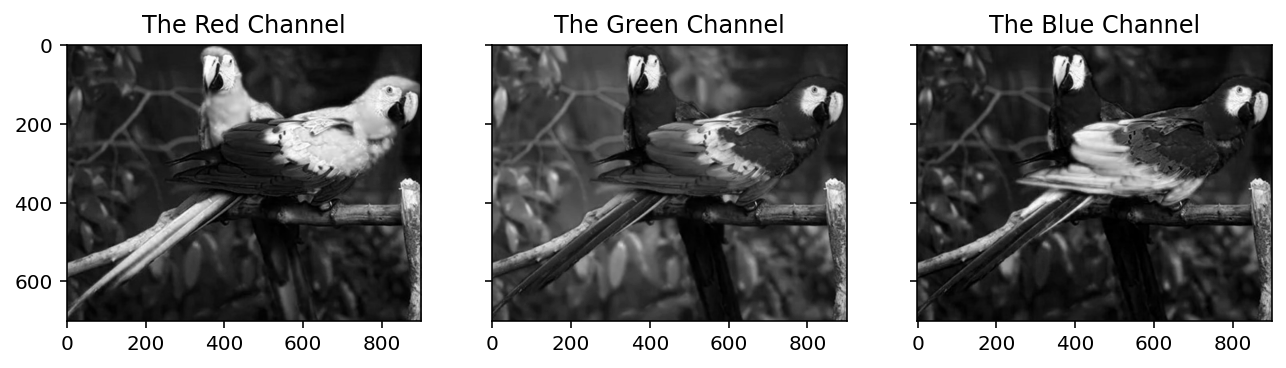

In [99]:
# The red channel
red_channel = img_arr[:, :, 0]
assert red_channel.shape == (700, 900)

# The green channel
green_channel = img_arr[:, :, 1]
assert green_channel.shape == (700, 900)

# The blue channel
blue_channel = img_arr[:, :, 2]
assert blue_channel.shape == (700, 900)


fig, axes = plt.subplots(1, 3, dpi=144, figsize=(3.6*3, 2.8), sharex=True, sharey=True)

ax = axes[0]
ax.imshow(red_channel, cmap='gray')
ax.set_title('The Red Channel')

ax = axes[1]
ax.imshow(green_channel, cmap='gray')
ax.set_title('The Green Channel')

ax = axes[2]
ax.imshow(blue_channel, cmap='gray')
ax.set_title('The Blue Channel');

Let's remove the green channel for fun!

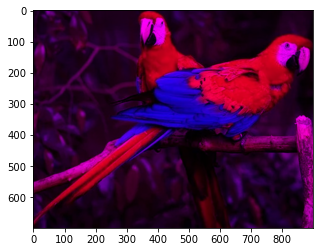

In [100]:
img_arr2 = img_arr.copy()
img_arr2[:, :, 1] = 0

plt.imshow(img_arr2);

The linear luminance of a pixel can be computed as

$$ Y = 0.2126 R + 0.7152 G + 0.0722 B $$

<font color=red>Challenge</font>: Take this colored image, and turn it into a gray-scaled image. Do this in four different way.

**Approach 1**: Take a manual summation

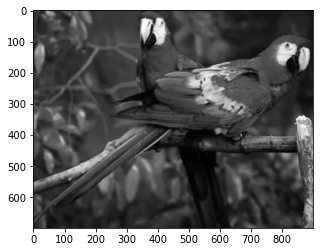

In [75]:
gray1 = 0.2126 * red_channel + 0.7152 * green_channel + 0.0722 * blue_channel
plt.imshow(gray1, cmap='gray');

**Approach 2**: Broadcast-multiply by weights, and then take a summation!

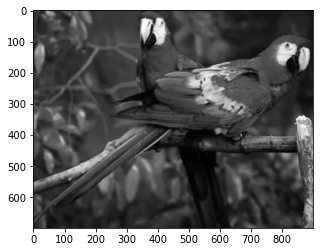

In [76]:
# TODO: implement approach 2
weights = np.array([0.2126,0.7152,0.0722])
gray2 = np.sum(weights[np.newaxis,np.newaxis,:] * img_arr, axis=2)
plt.imshow(gray2, cmap='gray');

**Approach 3**: Do it with matrix multiplication!

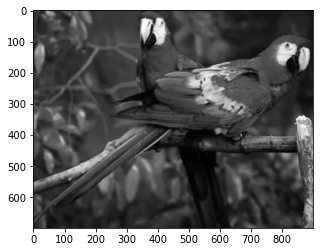

In [77]:
# TODO: implement approach 3
gray3 = img_arr @ weights
plt.imshow(gray3, cmap='gray');

**Approach 4**: Do it with einstein sums!

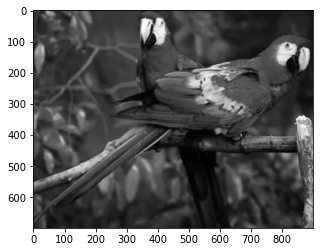

In [107]:
# TODO: implement approach 4
gray4 = np.einsum('k,ijk->ij',weights,img_arr)
plt.imshow(gray4, cmap='gray');

<font color=red>Challenge</font>: Replace each pixel with the average of its neighbors. Do not use convolutions.

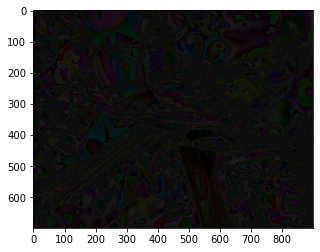

In [112]:
# TODO: implement this challenge

# pad the image to account for the edges
padded_img = np.pad(img_arr, ((1, 1), (1, 1), (0, 0)), mode='edge')

# sum the pixel's neighbors (including itself) using array slicing
top_left = padded_img[:-2, :-2]
top_center = padded_img[1:-1, :-2]
top_right = padded_img[2:, :-2]
left = padded_img[:-2, 1:-1]
center = padded_img[1:-1, 1:-1]
right = padded_img[2:, 1:-1]
bottom_left = padded_img[:-2, 2:]
bottom_center = padded_img[1:-1, 2:]
bottom_right = padded_img[2:, 2:]

# compute the average by summing the neighboring pixels and dividing by 9
sum_img = top_left + top_center + top_right + left + center + right + bottom_left + bottom_center + bottom_right
mean_img = sum_img / 9.0

# ensure pixel values are between 0 and 255, then display
mean_img = np.clip(mean_img, 0, 255).astype(np.uint8)
plt.imshow(mean_img)

#the resulting image is quite dark and difficult to see on the monitor
#adding a bit of luminance (128 seems reasonable) will brighten it enough to see the image better, debugging only
#mean_img = np.clip(mean_img, 0, 255).astype(np.uint8) + 128 
#plt.imshow(mean_img) ## result is dark, but appears correct

<font color=red>Challenge</font>: This is a 700 by 900 pixel image:

* Divide it into 7 by 9 grids.
* In each grid, find the pixel with maximum luminance.
* Print the **colored max-luminance** image.
* You can only use array operations (i.e., no loops/lists/etc.)

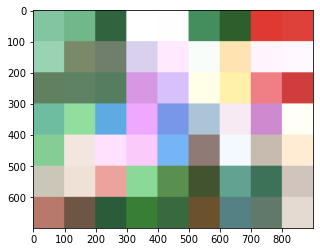

In [113]:
# TODO: implement this challenge

# compute the luminance of the image.
luminance = 0.2126 * img_arr[:, :, 0] + 0.7152 * img_arr[:, :, 1] + 0.0722 * img_arr[:, :, 2]

# reshape the luminance and color channels into 7x9 grid
luminance_reshaped = luminance.reshape(7, 100, 9, 100)
red_reshaped = img_arr[:, :, 0].reshape(7, 100, 9, 100)
green_reshaped = img_arr[:, :, 1].reshape(7, 100, 9, 100)
blue_reshaped = img_arr[:, :, 2].reshape(7, 100, 9, 100)

# get the max luminance color values for each 7x9 grid
max_red = red_reshaped.max(axis=(1, 3))
max_green = green_reshaped.max(axis=(1, 3))
max_blue = blue_reshaped.max(axis=(1, 3))

# reconstruct the image with max-luminance pixels
max_luminance_image = np.zeros_like(img_arr)

# assign the corresponding max color values to the reconstructed image
# here we expand the color channel values to match the grid positions
max_luminance_image[:, :, 0] = red_reshaped.max(axis=(1, 3)).repeat(100, axis=0).repeat(100, axis=1)
max_luminance_image[:, :, 1] = green_reshaped.max(axis=(1, 3)).repeat(100, axis=0).repeat(100, axis=1)
max_luminance_image[:, :, 2] = blue_reshaped.max(axis=(1, 3)).repeat(100, axis=0).repeat(100, axis=1)

# display the result
plt.imshow(max_luminance_image)

<font color=red>Challenge</font>: Let's say you have an $N\times D$ data matrix and a bunch of labels $y$. You have $C$ classes in your data.
    
Find the data mean within each class. You can only use numpy operations.

In [81]:
N = 100
D = 8
C = 10

np.random.seed(12345)
X = np.random.randn(N, D)
assert X.shape == (N, D)
Y = np.random.randint(0, C, N)
assert Y.shape == (N,)

In [114]:
# TODO: implement this challenge

sums = np.zeros((C, D))  # sum of data points for each class
counts = np.zeros(C)  # number of data points in each class

np.add.at(sums, Y, X)  # accumulate the sum of X for each class based on y
np.add.at(counts, Y, 1)  # count the number of points in each class

# compute the means for each class by dividing the sums by the counts
means = sums / counts[:, None]  # divide each sum by the corresponding count

print("Class means:")
print(means)

Class means:
[[ 0.19567428  0.09357463  0.57269824 -0.00163779 -0.24052048 -0.09947792
  -0.67918995 -0.80903979]
 [-0.08312662  0.17758474  0.08831717 -0.25794646 -0.12689232 -0.39598923
  -0.01991459  0.51240232]
 [ 0.44384962  0.48535851  0.00706221  0.17432556  0.04869878  0.10731768
  -0.31851399  0.3194932 ]
 [-0.24203431  0.13162678  0.63259124 -0.77417844 -0.54404245  0.44038989
   0.11625256  0.28378913]
 [-0.0557919  -0.06013906 -0.71413883  0.21113392 -0.02650542  0.52004882
   0.23564077  0.30166433]
 [-0.12004767 -0.55674487 -0.43568148  0.029228    0.35728765  0.10181334
  -0.12394546  0.21727235]
 [-0.44145551 -0.30353433  0.33890844 -0.48943767  0.50979905 -0.05505596
   0.46410527  0.30539076]
 [ 0.01968397  0.1136857   0.65167131  0.35435204 -0.45667171 -0.14955894
  -0.36684724  0.10912459]
 [-0.40218841  0.11274615 -0.15110982 -0.43685238 -0.06668889  0.25474659
  -0.15950105  0.0482076 ]
 [ 0.10187366  0.09608878  0.36751535 -0.37591602 -0.14133345 -0.29572198
  -0